In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

### Simple Linear Regression

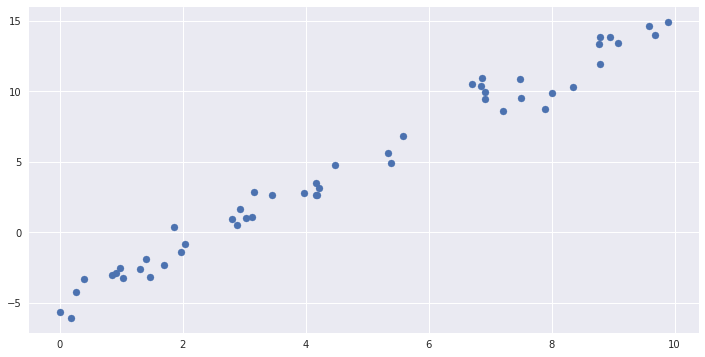

In [3]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5  + rng.randn(50)
plt.scatter(x, y);

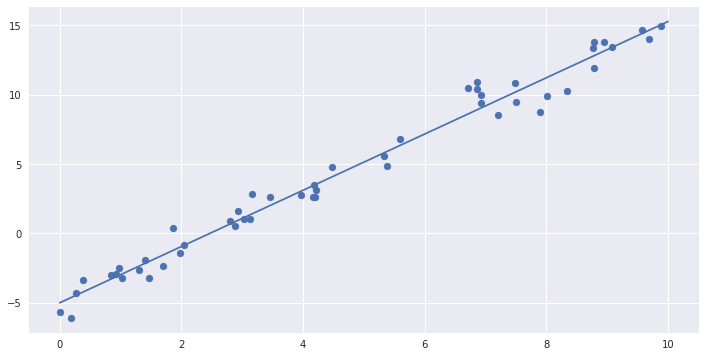

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, None])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [5]:
print("Model slope: ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:  2.02720881036
Model intercept: -4.99857708555


In [6]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2, 1])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5
[ 1.5 -2.   1. ]


### Polynomial basis functions

In [7]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.]])

In [8]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

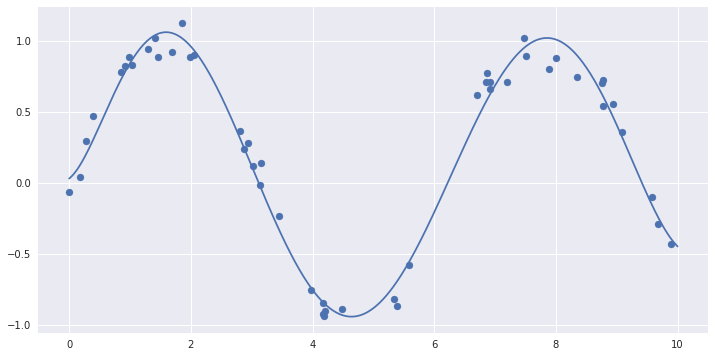

In [9]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, None], y)
yfit = poly_model.predict(xfit[:, None])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [10]:
poly_model.get_params()

{'linearregression': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 'linearregression__copy_X': True,
 'linearregression__fit_intercept': True,
 'linearregression__n_jobs': 1,
 'linearregression__normalize': False,
 'memory': None,
 'polynomialfeatures': PolynomialFeatures(degree=7, include_bias=True, interaction_only=False),
 'polynomialfeatures__degree': 7,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'steps': [('polynomialfeatures',
   PolynomialFeatures(degree=7, include_bias=True, interaction_only=False)),
  ('linearregression',
   LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]}

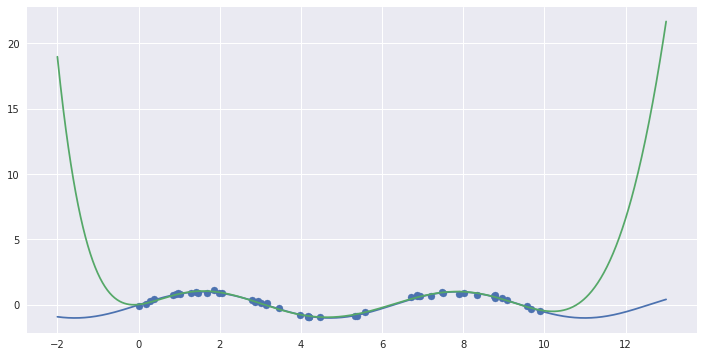

In [11]:
lim = 10
xnew = np.linspace(-2, 13, 1000)
ynew = poly_model.predict(xnew[:, None])

plt.scatter(x, y)
plt.plot(xnew, np.sin(xnew))
plt.plot(xnew, ynew);

In [12]:
import sklearn
sklearn.__version__

'0.19.1'

### Gaussian basis functions

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
        
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self, X, y=None):
        # Create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

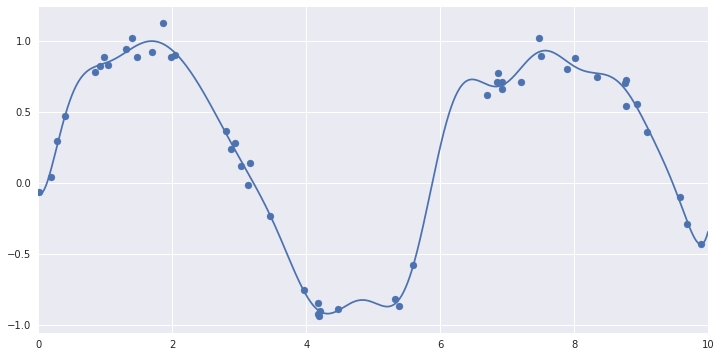

In [14]:
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())

gauss_model.fit(x[:, None], y)
yfit = gauss_model.predict(xfit[:, None])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

In [15]:
def make_data(N, err=0.1, rseed=1):
    rng = np.random.RandomState(1)
    x = 10 * rng.rand(N)
    X = x[:, None]
    y = np.sin(x)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

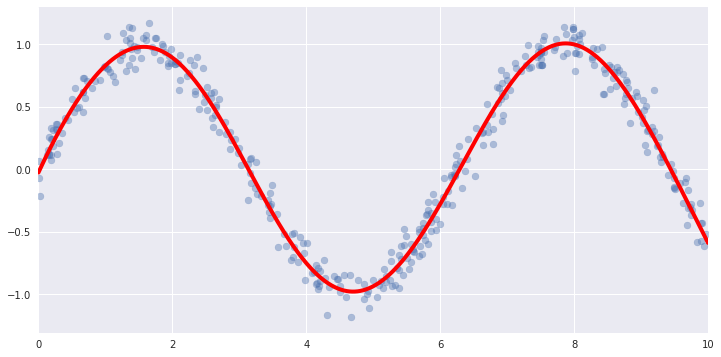

In [16]:
X, y = make_data(400, err=0.1)

gauss_model = make_pipeline(GaussianFeatures(10),
                            LinearRegression())

gauss_model.fit(X, y)
yfit = gauss_model.predict(xfit[:, None])

plt.scatter(X.flatten(), y, alpha=0.4)
plt.plot(xfit, yfit, linewidth=4, color='red')
plt.xlim(0, 10);

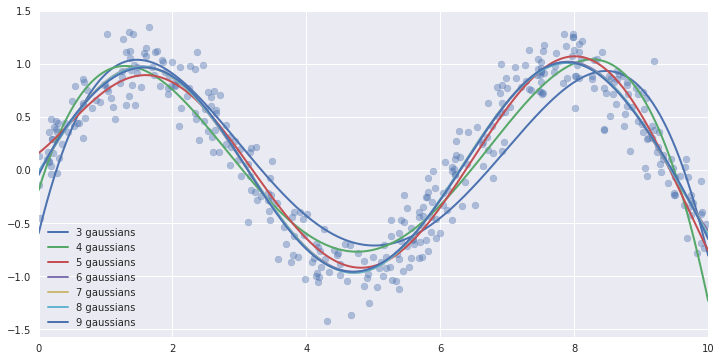

In [41]:
X, y = make_data(400, err=0.2)

gaussians = np.arange(3, 10)

plt.scatter(X.flatten(), y, alpha=0.4)
for N in gaussians:
    gauss_model = make_pipeline(GaussianFeatures(N),
                                LinearRegression())
    gauss_model.fit(X, y)
    yfit = gauss_model.predict(xfit[:, None])
    plt.plot(xfit, yfit, linewidth=2, label='{0} gaussians'.format(N))
plt.xlim(0, 10)
plt.legend();

In [18]:
def GaussianRegression(N=10, width_factor=2):
    return make_pipeline(GaussianFeatures(N, width_factor),
                         LinearRegression())

from sklearn.learning_curve import validation_curve

GaussianFeatures(1).get_params().keys()

/home/xoel/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/xoel/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


dict_keys(['N', 'width_factor'])

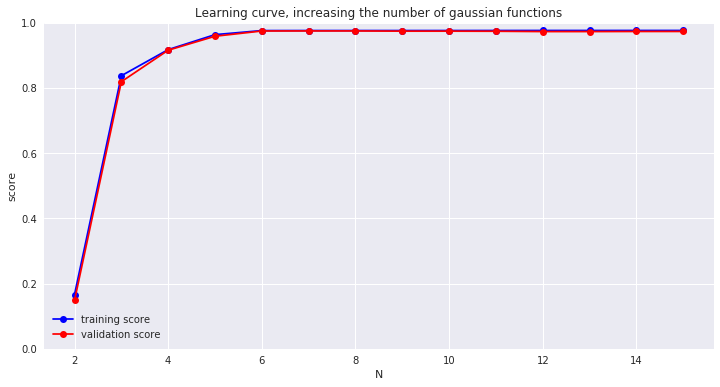

In [19]:
X, y = make_data(400, err=0.1)

N = np.arange(2, 16)

train_score, val_score = validation_curve(estimator=GaussianRegression(), X=X, y=y, 
                                          param_name='gaussianfeatures__N', 
                                          param_range=N, cv=7)

plt.figure(figsize=(12, 6))
plt.plot(N, np.median(train_score, 1), marker='o', 
         color='blue', label='training score')
plt.plot(N, np.median(val_score, 1), marker='o',
         color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.title('Learning curve, increasing the number of gaussian functions')
plt.xlabel('N')
plt.ylabel('score');

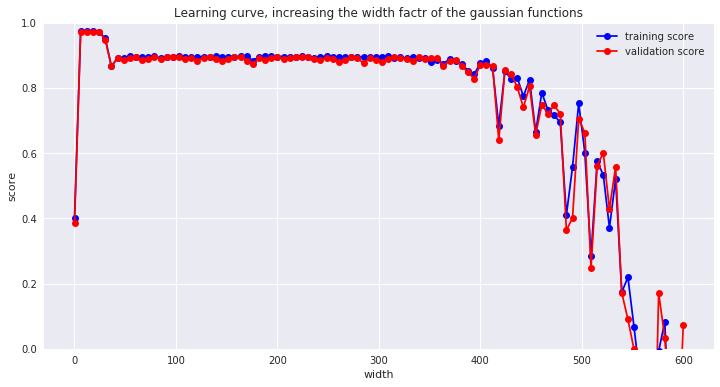

In [23]:
X, y = make_data(400, err=0.1)

N = np.arange(2, 16)
widths = np.linspace(0.1, 600, 100)

train_score, val_score = validation_curve(estimator=GaussianRegression(6), X=X, y=y, 
                                          param_name='gaussianfeatures__width_factor', 
                                          param_range=widths, cv=7)

plt.figure(figsize=(12, 6))
plt.plot(widths, np.median(train_score, 1), marker='o', 
         color='blue', label='training score')
plt.plot(widths, np.median(val_score, 1), marker='o',
         color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.title('Learning curve, increasing the width factr of the gaussian functions')
plt.xlabel('width')
plt.ylabel('score');

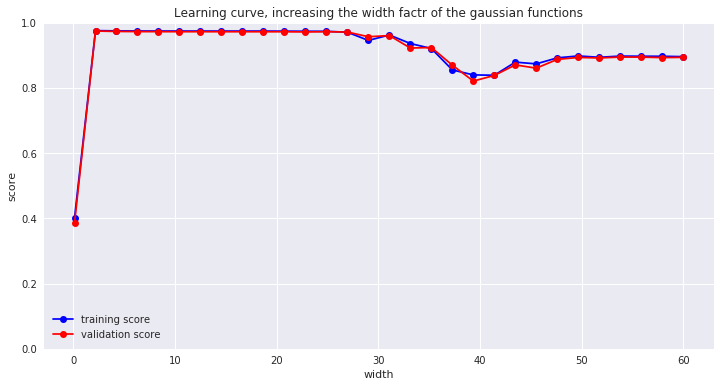

In [24]:
X, y = make_data(400, err=0.1)

N = np.arange(2, 16)
widths = np.linspace(0.1, 60, 30)

train_score, val_score = validation_curve(estimator=GaussianRegression(6), X=X, y=y, 
                                          param_name='gaussianfeatures__width_factor', 
                                          param_range=widths, cv=7)

plt.figure(figsize=(12, 6))
plt.plot(widths, np.median(train_score, 1), marker='o', 
         color='blue', label='training score')
plt.plot(widths, np.median(val_score, 1), marker='o',
         color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.title('Learning curve, increasing the width factr of the gaussian functions')
plt.xlabel('width')
plt.ylabel('score');

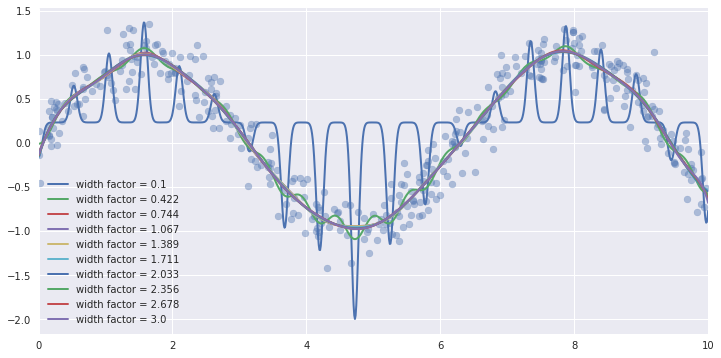

In [50]:
X, y = make_data(400, err=0.2)

widths = np.linspace(.1, 3, 10)

plt.scatter(X.flatten(), y, alpha=0.4)
for w in widths:
    gauss_model = make_pipeline(GaussianFeatures(20, width_factor=w),
                                LinearRegression())
    gauss_model.fit(X, y)
    yfit = gauss_model.predict(xfit[:, None])
    plt.plot(xfit, yfit, linewidth=2, label='width factor = {}'.format(np.round(w, 3)))
plt.xlim(0, 10)
plt.legend();

##### Conclussions of cross validation on Gaussian basis functions linear regression


A width factor between 1 and 20 worked well in this case. 
The best number of gaussian functions in this case was of around 6. 

## Regularization

#### Ridge regularization

(-1.5, 1.5)

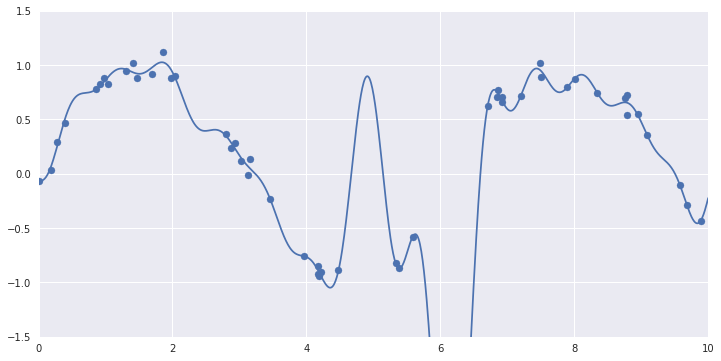

In [51]:
X, y = make_data(50)


model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(X, y)
plt.scatter(X.flatten(), y)
plt.plot(xfit, model.predict(xfit[:, None]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

In [57]:
step1 = model.steps[0][1]
step2 = model.steps[1][1]
step2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

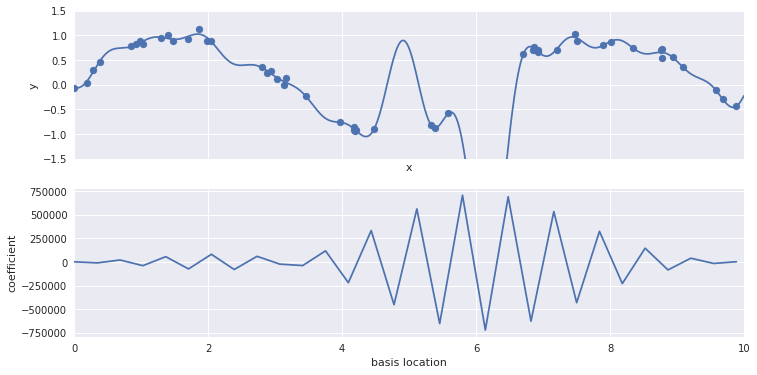

In [58]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(X, y)
    ax[0].scatter(X.flatten(), y)
    ax[0].plot(xfit, model.predict(xfit[:, None]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)
        
        
    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())    
basis_plot(model)

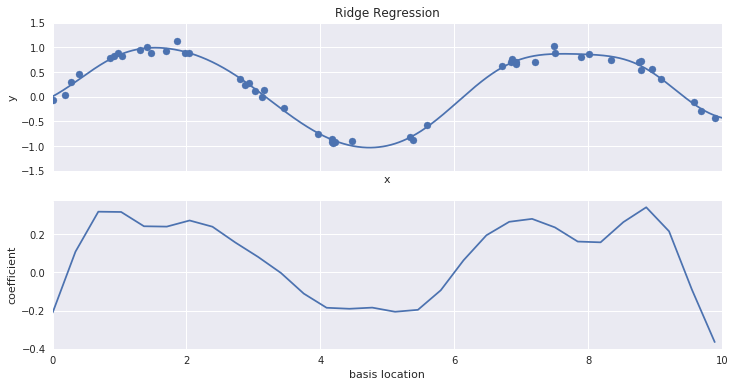

In [60]:
from sklearn.linear_model import  Ridge
ridge_model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model=ridge_model, title='Ridge Regression')

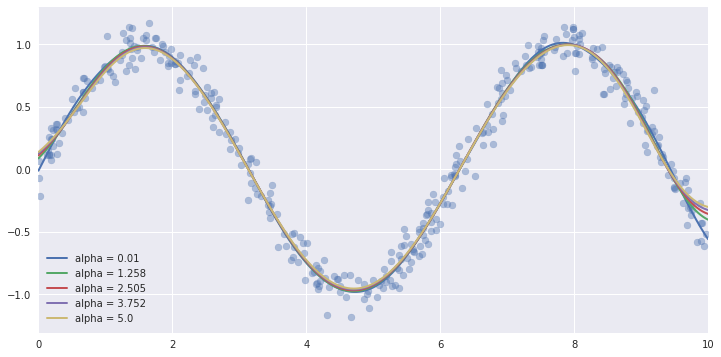

In [93]:
X, y = make_data(400, err=0.1)

alpha = np.linspace(.01, 5, num=5)

plt.scatter(X.flatten(), y, alpha=0.4)
for a in alpha:
    ridge_model = make_pipeline(GaussianFeatures(30), Ridge(alpha=a))
    ridge_model.fit(X, y)
    yfit = ridge_model.predict(xfit[:, None])
    plt.plot(xfit, yfit, linewidth=2, label='alpha = {}'.format(np.round(a, 3)))
plt.xlim(0, 10)
plt.legend();

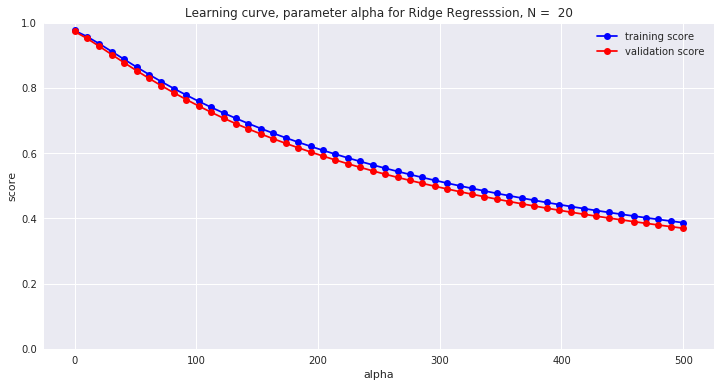

In [95]:
X, y = make_data(400, err=0.1)

N = 20
widths = np.linspace(0.1, 60, 30)

alpha = np.linspace(0.0001, 500, 50)

def ridge_regression(N=30, alpha=0.1):
    return make_pipeline(GaussianFeatures(N), Ridge(alpha=alpha))

train_score, val_score = validation_curve(estimator=ridge_regression(N=N), X=X, y=y, 
                                          param_name='ridge__alpha', 
                                          param_range=alpha, cv=7)

plt.figure(figsize=(12, 6))
plt.plot(alpha, np.median(train_score, 1), marker='o', 
         color='blue', label='training score')
plt.plot(alpha, np.median(val_score, 1), marker='o',
         color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.title('Learning curve, parameter alpha for Ridge Regresssion, N =  {}'.format(N))
plt.xlabel('alpha')
plt.ylabel('score');

#### Lasso regularization

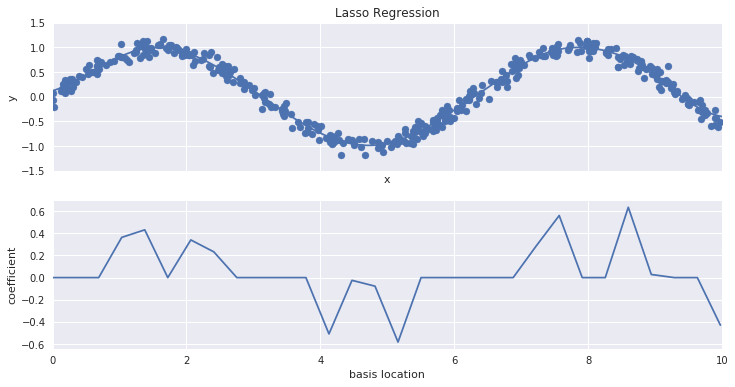

In [100]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

### Example: Predicting Bicycle Traffic

In [105]:
import pandas as pd
counts = pd.read_csv('../data/FremontBridge.csv', index_col='Date', parse_dates=True)
counts.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [107]:
weather = pd.read_csv('../data/BicycleWeather.csv', index_col='DATE', parse_dates=True)
weather.head()

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,128,50,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,109,0,0,106,28,45,180,200,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,8,0,0,117,72,23,180,170,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999
2012-01-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,203,0,0,122,56,47,180,190,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,13,0,0,89,28,61,200,220,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999


In [108]:
daily = counts.resample('d', how='sum')
daily.head()

/home/xoel/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03,1760.0,1761.0
2012-10-04,1708.0,1767.0
2012-10-05,1558.0,1590.0
2012-10-06,1080.0,926.0
2012-10-07,1191.0,951.0


In [113]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk,Total
Date,,,
2012-10-03,1760.0,1761.0,3521.0
2012-10-04,1708.0,1767.0,3475.0
2012-10-05,1558.0,1590.0,3148.0
2012-10-06,1080.0,926.0,2006.0
2012-10-07,1191.0,951.0,2142.0


In [116]:
daily  = daily[['Total']] # remove other columns
daily.head()

,Total
Date,
2012-10-03,3521.0
2012-10-04,3475.0
2012-10-05,3148.0
2012-10-06,2006.0
2012-10-07,2142.0


In [120]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [123]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [155]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN


In [157]:
daily['holiday'].fillna(0, inplace=True)
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


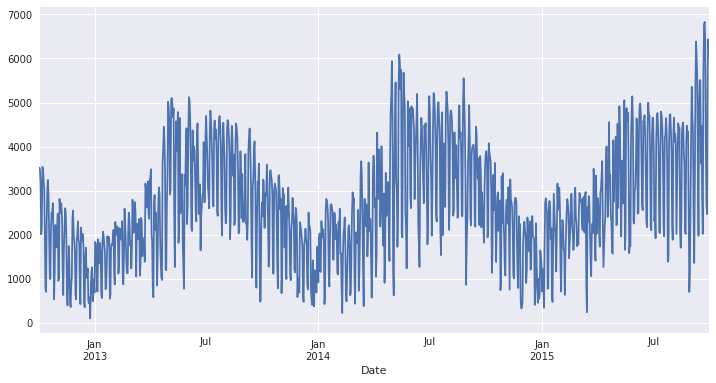

In [159]:
daily.Total.plot();

In [170]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight fo the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1 - np.tan(np.radians(latitude)) \
        * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24 * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180

In [171]:
hours_of_daylight(pd.datetime.today())

8.2770389733071603

In [172]:
daily['dailight_hrs'] = [hours_of_daylight(x) for x in daily.index]
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,dailight_hrs
Date,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208


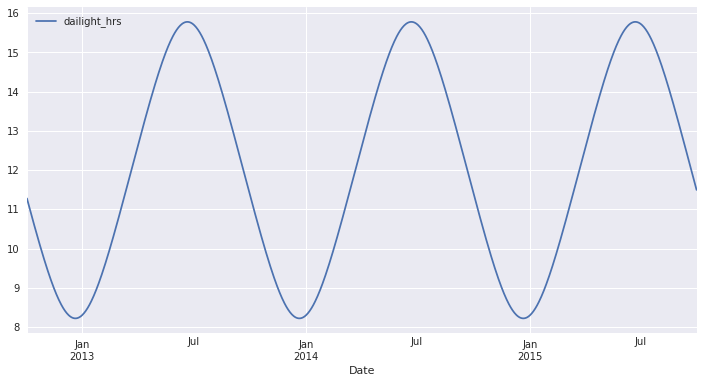

In [174]:
daily.dailight_hrs.plot(legend=True);

In [176]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

In [178]:
daily['annual'] = (daily.index - daily.index[0]).days / 365

In [177]:
daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,dailight_hrs,PRCP,Temp (C),dry day
Date,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0


In [191]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,dailight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0.000000
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0.002740
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0,0.005479
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0,0.008219
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0,0.010959


In [196]:
daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']

X = daily[column_names]
y = daily.Total

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

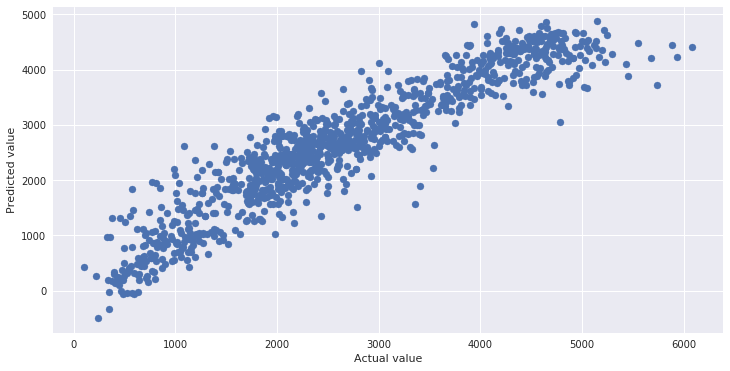

In [199]:
plt.scatter(daily.Total, daily.predicted)
plt.xlabel('Actual value')
plt.ylabel('Predicted value');

In [200]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon              501.529506
Tue              615.964486
Wed              589.391681
Thu              478.935936
Fri              174.454339
Sat            -1106.451896
Sun            -1136.789663
holiday        -1186.818446
daylight_hrs     128.918672
PRCP            -665.916842
dry day          543.024483
Temp (C)          65.260412
annual            29.793048
dtype: float64

In [206]:
resample(X, y)[0].shape, resample(X, y)[1].shape

((1064, 13), (1064,))

In [208]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_ 
              for i in range(1000)], axis=0)
err

array([  86.12905576,   83.23889706,   82.68958023,   84.99161062,
         80.88197358,   79.53081929,   82.93642591,  163.17538983,
          9.02453536,   62.35480417,   33.26605555,    3.60333665,
         17.70563269])

In [209]:
print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))

              effect  error
Mon            502.0   86.0
Tue            616.0   83.0
Wed            589.0   83.0
Thu            479.0   85.0
Fri            174.0   81.0
Sat          -1106.0   80.0
Sun          -1137.0   83.0
holiday      -1187.0  163.0
daylight_hrs   129.0    9.0
PRCP          -666.0   62.0
dry day        543.0   33.0
Temp (C)        65.0    4.0
annual          30.0   18.0
